In [83]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

In [84]:
df = pd.read_csv(r"CSV/votacao_secao_2022_BR.csv", encoding="Latin 1", sep=";")

In [85]:
df.head(2)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,NR_SECAO,CD_CARGO,DS_CARGO,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,NR_LOCAL_VOTACAO,SQ_CANDIDATO,NM_LOCAL_VOTACAO,DS_LOCAL_VOTACAO_ENDERECO
0,01/11/2022,16:05:25,2022,2,ELEIÇÃO ORDINÁRIA,1,544,ELEIÇÃO GERAL FEDERAL 2022,02/10/2022,F,...,157,1,PRESIDENTE,13,LUIZ INÁCIO LULA DA SILVA,138,1015,280001607829,CENTRO ADMINISTRATIVO FABIANO MELO (ANTIGA FAC...,"AV. GOIÁS, 556"
1,01/11/2022,16:05:25,2022,2,ELEIÇÃO ORDINÁRIA,1,544,ELEIÇÃO GERAL FEDERAL 2022,02/10/2022,F,...,500,1,PRESIDENTE,13,LUIZ INÁCIO LULA DA SILVA,173,2526,280001607829,UNIÃO GAÚCHA J. SIMÕES LOPES NETO,"AV. ENGENHEIRO ILDEFONSO SIMÕES LOPES, 531"


In [86]:
df.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_MUNICIPIO',
       'NM_MUNICIPIO', 'NR_ZONA', 'NR_SECAO', 'CD_CARGO', 'DS_CARGO',
       'NR_VOTAVEL', 'NM_VOTAVEL', 'QT_VOTOS', 'NR_LOCAL_VOTACAO',
       'SQ_CANDIDATO', 'NM_LOCAL_VOTACAO', 'DS_LOCAL_VOTACAO_ENDERECO'],
      dtype='object')

In [87]:
geocoded_df = pd.read_csv("CSV/geocoded_voting_places_001.csv")

In [88]:
df_lat_long = df.merge(geocoded_df, on = ['CD_MUNICIPIO', 'NR_ZONA', 'NR_LOCAL_VOTACAO'], how = 'left')

In [89]:
df_turno2_pres_rs_poa = df_lat_long[
    (df_lat_long['NR_TURNO']==2)&
    (df_lat_long['NM_MUNICIPIO']=='PORTO ALEGRE')&
    (df_lat_long['SG_UF']=='RS')&
    (df_lat_long['DS_CARGO']=='PRESIDENTE')&
    ((df_lat_long['NM_VOTAVEL']=='LUIZ INÁCIO LULA DA SILVA')|(df_lat_long['NM_VOTAVEL']=='JAIR MESSIAS BOLSONARO'))
    ][['NR_ZONA','NM_VOTAVEL','QT_VOTOS','NR_LATITUDE','NR_LONGITUDE']].groupby(by=
    ['NR_LATITUDE','NR_LONGITUDE','NR_ZONA','NM_VOTAVEL']).sum('QT_VOTOS')
df_turno2_pres_rs_poa

QT_VOTOS
NR_LATITUDE NR_LONGITUDE NR_ZONA NM_VOTAVEL                         
-30.241619  -51.078808   161     JAIR MESSIAS BOLSONARO          587
                                 LUIZ INÁCIO LULA DA SILVA       656
-30.220456  -51.096950   161     JAIR MESSIAS BOLSONARO         1180
                                 LUIZ INÁCIO LULA DA SILVA      1130
-30.213958  -51.050490   161     JAIR MESSIAS BOLSONARO           79
...                                                              ...
-29.980075  -51.186703   111     LUIZ INÁCIO LULA DA SILVA      2302
-29.979634  -51.125881   158     JAIR MESSIAS BOLSONARO         1069
                                 LUIZ INÁCIO LULA DA SILVA       873
-29.977045  -51.174244   111     JAIR MESSIAS BOLSONARO          248
                                 LUIZ INÁCIO LULA DA SILVA       261

[670 rows x 1 columns]

In [90]:
df_turno2_pres_rs_poa_pivot = pd.pivot_table(df_turno2_pres_rs_poa, values = 'QT_VOTOS', index=['NR_LATITUDE','NR_LONGITUDE','NR_ZONA'], columns = 'NM_VOTAVEL').reset_index()
df_turno2_pres_rs_poa_pivot['difference'] = df_turno2_pres_rs_poa_pivot['LUIZ INÁCIO LULA DA SILVA']-df_turno2_pres_rs_poa_pivot['JAIR MESSIAS BOLSONARO']
df_turno2_pres_rs_poa_pivot['size'] = df_turno2_pres_rs_poa_pivot['difference'].abs()
df_turno2_pres_rs_poa_pivot

NM_VOTAVEL,NR_LATITUDE,NR_LONGITUDE,NR_ZONA,JAIR MESSIAS BOLSONARO,LUIZ INÁCIO LULA DA SILVA,difference,size
0,-30.241619,-51.078808,161,587,656,69,69
1,-30.220456,-51.096950,161,1180,1130,-50,50
2,-30.213958,-51.050490,161,79,80,1,1
3,-30.212151,-51.132472,161,170,156,-14,14
4,-30.211709,-51.183310,161,1372,1346,-26,26
...,...,...,...,...,...,...,...
330,-29.981437,-51.133382,158,986,769,-217,217
331,-29.980086,-51.186704,111,1420,1592,172,172
332,-29.980075,-51.186703,111,1797,2302,505,505
333,-29.979634,-51.125881,158,1069,873,-196,196


In [ ]:
df_turno2_pres_rs_poa_pivot

In [91]:
# df_lat_long.stack().reset_index()

In [95]:
long = df_turno2_pres_rs_poa_pivot['NR_LONGITUDE']
lat =  df_turno2_pres_rs_poa_pivot['NR_LATITUDE']
geometry = [Point(xy) for xy in zip(long,lat)]
geo_df = gpd.GeoDataFrame(geometry = geometry)
geo_df['size'] = df_turno2_pres_rs_poa_pivot['size']


In [96]:
geo_df

,geometry,size
0,POINT (-51.07881 -30.24162),69
1,POINT (-51.09695 -30.22046),50
2,POINT (-51.05049 -30.21396),1
3,POINT (-51.13247 -30.21215),14
4,POINT (-51.18331 -30.21171),26
...,...,...
330,POINT (-51.13338 -29.98144),217
331,POINT (-51.18670 -29.98009),172
332,POINT (-51.18670 -29.98007),505
333,POINT (-51.12588 -29.97963),196


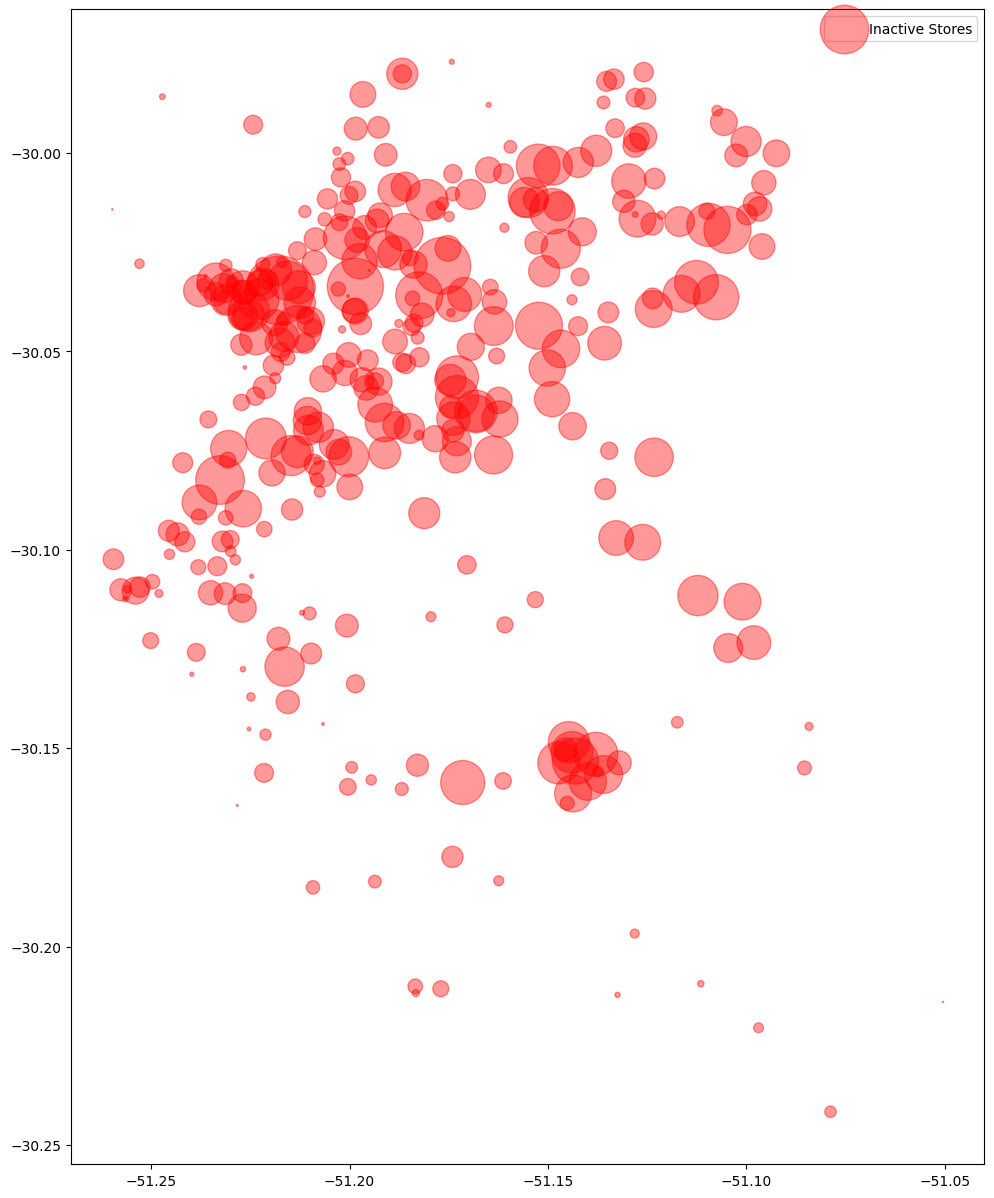

In [97]:
fig,ax=plt.subplots(figsize=(15,15))
geo_df.plot(ax=ax,markersize=geo_df['size'], alpha=0.4,color="red", label="Inactive Stores")
plt.legend()